# Joel Semeniuk

## Research question/interests


I am interested in this dataset to better understand the impacts of different health related factors on insurance charges. I am also interested in how these various health factors effects one's BMI score.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Milestone 3
### Task 1 EDA

There are 1338 entries with 7 columns

In [29]:
data = pd.read_csv("../data/raw/insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Below shows the first 5 entries, just to show what they look like.

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here is a quick summary through the numeric columns.

In [31]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here all rows that contained null were dropped. It looks like all of the rows were kept so there were no null values.

In [32]:
df_dropped = data.dropna(axis=0)
df_dropped

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Changing the smoker column from string to bool.

In [33]:
data["smoker"] = data["smoker"] == "yes"
data["smoker"]

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

This histogram shows the distribution of charges. Looks like there are more less expensive charges than more expensive.

<AxesSubplot:xlabel='charges', ylabel='Count'>

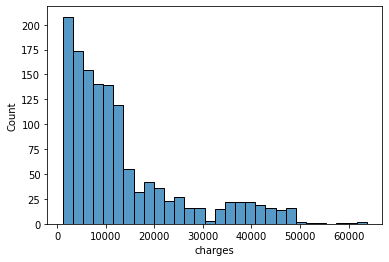

In [50]:
sns.histplot(data["charges"])

This scatter plot with charges vs bmi doesn't inherently show any correlation between the two. Seaborn's regression line fit does suggest a slight positive line though.

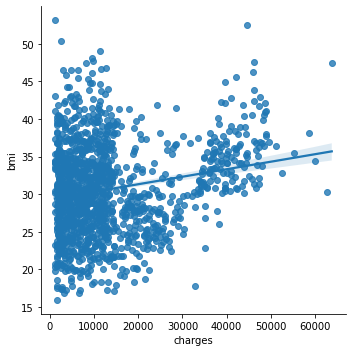

In [51]:
sns.lmplot(x="charges", y="bmi", data=data)

This boxplot shows that smokers in this dataset tended to have larger medical charges than those who do not smoke.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

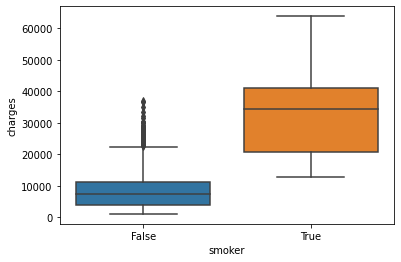

In [44]:
sns.boxplot(x="smoker", y="charges",data=data)

The boxplot below shows that there is only slight differences between the amount of children when looking at medical charges.

<AxesSubplot:xlabel='children', ylabel='charges'>

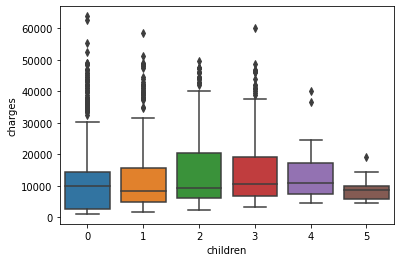

In [52]:
sns.boxplot(x="children", y="charges",data=data)

### Task 2 Analysis Pipeline

Load data

In [264]:
df = pd.read_csv("../data/raw/insurance.csv")

Clean data -
Drop all entries that contain a null value. Drop the "region" column. Change the string type in smoker to a bool type. Round the charges to 2 decimal places to better represent currency.

In [265]:
df = df.dropna(axis=0)
df = df.drop("region", axis=1)
df = df.assign(smoker=df["smoker"] == "yes")
df = df.assign(charges=round(df["charges"], 2))

Process Data

In [266]:
def getWeightStatus(row):
    if row["bmi"] < 18.5:
        return "Underweight"
    elif row["bmi"] >= 18.5 and row["bmi"] < 25.0:
        return "Healthy Weight"
    elif row["bmi"] >= 25.0 and row["bmi"] < 30.0:
        return "Overweight"
    elif row["bmi"] >= 30.0:
        return "Obesity"
    else:
        return "Unknown"


In [267]:

df = df.assign(weightStatus=df.apply(getWeightStatus, axis=1))
df = df.sort_values("charges")
df = df.reset_index()
df = df.drop("index", axis=1)
df

,age,sex,bmi,children,smoker,charges,weightStatus
0,18,male,23.210,0,False,1121.87,Healthy Weight
1,18,male,30.140,0,False,1131.51,Obesity
2,18,male,33.330,0,False,1135.94,Obesity
3,18,male,33.660,0,False,1136.40,Obesity
4,18,male,34.100,0,False,1137.01,Obesity
...,...,...,...,...,...,...,...
1333,33,female,35.530,0,True,55135.40,Obesity
1334,31,female,38.095,1,True,58571.07,Obesity
1335,52,male,34.485,3,True,60021.40,Obesity
1336,45,male,30.360,0,True,62592.87,Obesity


Wrangle Data- Changing order of columns

In [220]:
df = df[["charges", "bmi", "weightStatus", "smoker", "children", "age", "sex"]]

Saving dataframe as csv

In [221]:
df.to_csv("../data/processed/insurance_JOEL.csv", index=False)

### Task 3 Method Chaining

In [282]:
df1 = (pd.read_csv("../data/raw/insurance.csv")
    .dropna(axis=0)
    .drop("region", axis=1)
  )

df2 = (df1.assign(smoker=df1["smoker"] == "yes")
        .assign(charges=round(df1["charges"], 2))
        .assign(weightStatus=df1.apply(getWeightStatus, axis=1))
      )

df3 = (df2
        .sort_values("charges")
        .reset_index()
        .drop("index", axis=1)
      )

df4 = df3[["charges", "bmi", "weightStatus", "smoker", "children", "age", "sex"]]


In [283]:
def load_and_process(url):
    df1 = (pd.read_csv(url)
        .dropna(axis=0)
        .drop("region", axis=1)
      )
        
    df2 = (df1.assign(smoker=df1["smoker"] == "yes")
            .assign(charges=round(df1["charges"], 2))
            .assign(weightStatus=df1.apply(getWeightStatus, axis=1))
          )
    
    df3 = (df2
            .sort_values("charges")
            .reset_index()
            .drop("index", axis=1)
          )
    df4 = df3[["charges", "bmi", "weightStatus", "smoker", "children", "age", "sex"]]
    return df4

load_and_process("../data/raw/insurance.csv")

,charges,bmi,weightStatus,smoker,children,age,sex
0,1121.87,23.210,Healthy Weight,False,0,18,male
1,1131.51,30.140,Obesity,False,0,18,male
2,1135.94,33.330,Obesity,False,0,18,male
3,1136.40,33.660,Obesity,False,0,18,male
4,1137.01,34.100,Obesity,False,0,18,male
...,...,...,...,...,...,...,...
1333,55135.40,35.530,Obesity,True,0,33,female
1334,58571.07,38.095,Obesity,True,1,31,female
1335,60021.40,34.485,Obesity,True,3,52,male
1336,62592.87,30.360,Obesity,True,0,45,male
